In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

In [8]:
# 1. 分类：预测离散标签
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

# 生成分类的数据
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# 生成50个点
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

# 使用SVM分类模型
clf = SVC(kernel='linear')
clf.fit(X, y)

# 生成一些新的点用来预测
X2, _ = make_blobs(n_samples=80, centers=2, random_state=0, cluster_std=0.8)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

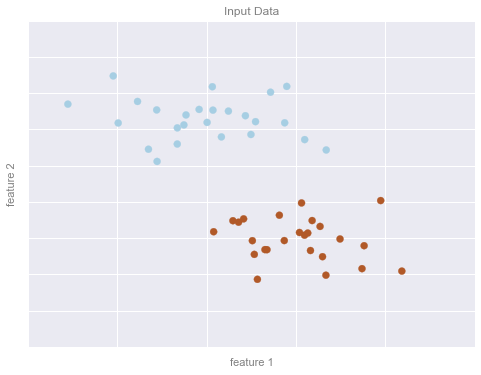

In [10]:
# 画出生成数据点的分布
sns.set()
fig, ax = plt.subplots(figsize=(8,6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

format_plot(ax, 'Input Data')
ax.axis([-1,4, -2,7])
#fig.savefig('figures/05.01-classification-1.png')

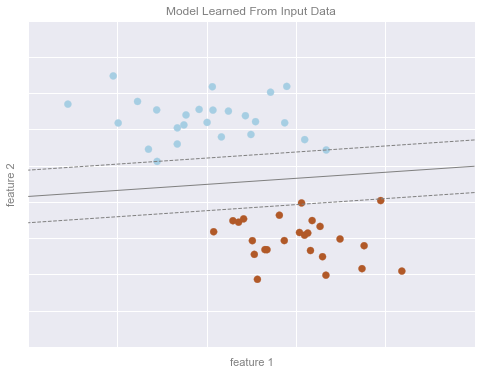

In [12]:
# Classification Example Figure 2
# 画出SVM模型的决策边界
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t]) for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

fig, ax = plt.subplots(figsize=(8,6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths = 1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

format_plot(ax, 'Model Learned From Input Data')
ax.axis([-1,4, -2,7])

#fig.savefig('figures/05.01-classification-2.png')

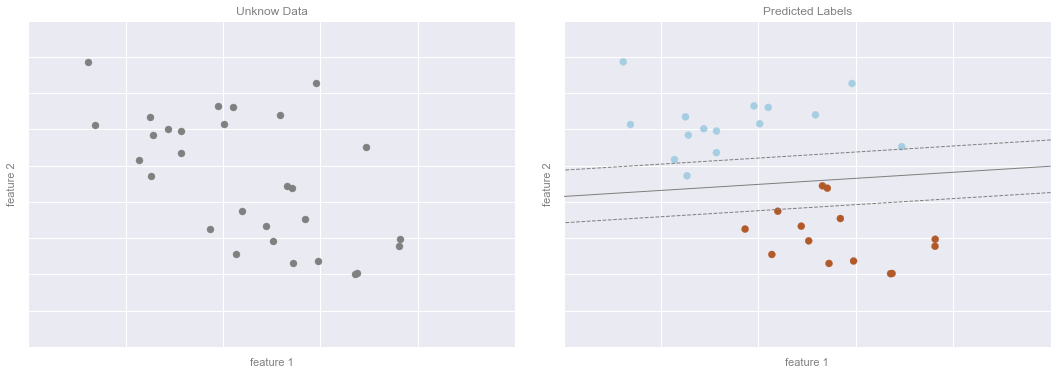

In [14]:
# 画出预测的结果
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1,4, -2,7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1,4, -2,7])

format_plot(ax[0], 'Unknow Data')
format_plot(ax[1], 'Predicted Labels')

#fig.savefig('figures/05.01-classification-3.png')

In [17]:
# Regression Example Figure 1
from sklearn.linear_model import LinearRegression

# 创建用于回归的数据
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# 用线性回归模型拟合数据
cls = LinearRegression()
cls.fit(X, y)

# 创建用于预测的数据
X2 = rng.randn(100, 2)

y2 = cls.predict(X2)

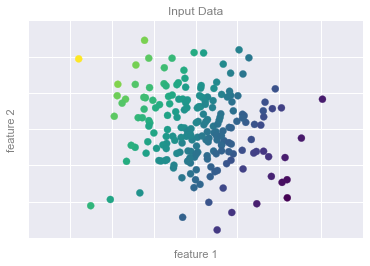

In [18]:
# 画出训练的数据点
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
format_plot(ax, 'Input Data')
ax.axis([-4,4, -3,3])
#fig.savefig('figures/05.01-regression-1.png')

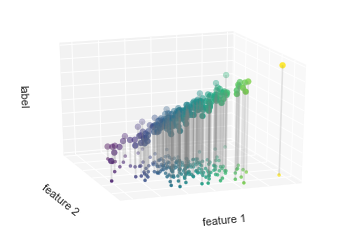

In [20]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35, cmap='viridis')
ax.add_collection3d(Line3DCollection(segments, color='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10, cmap='viridis')

ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)
for tick in ax.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_zaxis.get_ticklines():
    tick.set_visible(False)
fig.savefig('figures/05.01-regression-2.png')

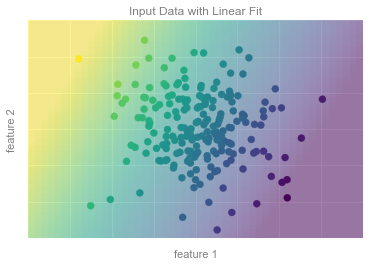

In [21]:
from matplotlib.collections import LineCollection

fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4,4),
                     np.linspace(-3,3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = cls.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4,4], [-3,3], zz, alpha=0.5,
              cmap='viridis', norm=pts.norm, zorder=1)
format_plot(ax, 'Input Data with Linear Fit')
ax.axis([-4,4, -3, 3])
fig.savefig('figures/05.01-regression-3.png')

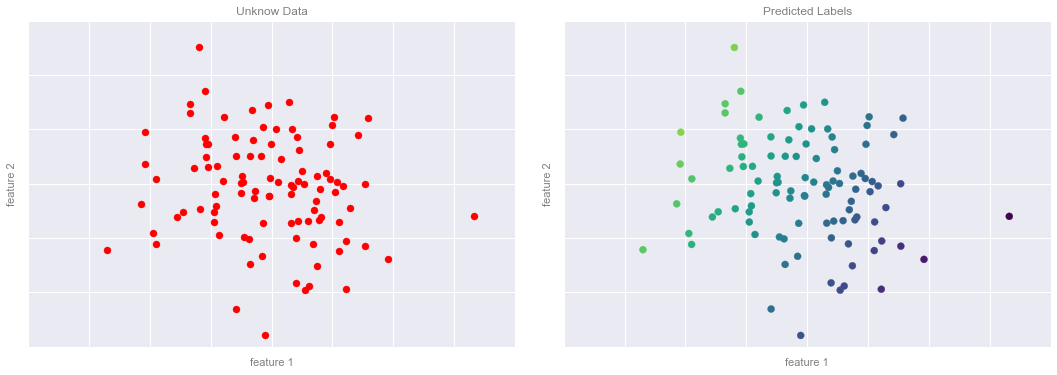

In [25]:
# plot the model fit
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625,right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='red', s=50)
ax[0].axis([-4,4, -3,3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='viridis', norm=pts.norm)
ax[1].axis([-4,4, -3,3])

format_plot(ax[0], 'Unknow Data')
format_plot(ax[1], 'Predicted Labels')

#fig.savefig('figures/05.01-regression-4.png')